<a href="https://colab.research.google.com/github/edidenko-eva/master_thesis_2025/blob/main/Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and settings

In [3]:
!pip install umap-learn
!pip install kneed

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [5]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Datasets

In [7]:
data = pd.read_excel("/content/drive/MyDrive/Datasets_diplom/real_data_transformed.xlsx") #real_data_transformed.xlsx dataset_synth_all.xlsx
data

,Label,Area,Mean,StdDev,Mode,Min,Max,X,Y,XM,...,Kurt_var,%Area_var,RawIntDen_var,FeretX_var,FeretY_var,FeretAngle_var,MinFeret_var,AR_var,Round_var,Solidity_var
0,image-final_00160000.tif,20524.097,27.842,18.627,15,4,117,80.474,63.76,79.839,...,9.497,100.0,12404093,0,0,141.61,1030,1.262,0.792,1
1,image-final_00160001.tif,20524.097,28.783,19.877,15,2,124,80.474,63.76,79.822,...,11.273,100.0,13067373,0,0,141.61,1030,1.262,0.792,1
2,image-final_00160002.tif,20524.097,29.737,21.141,15,1,135,80.474,63.76,79.809,...,13.094,100.0,13825041,0,0,141.61,1030,1.262,0.792,1
3,image-final_00160003.tif,20524.097,30.694,22.399,15,2,138,80.474,63.76,79.787,...,15.227,100.0,14609169,0,0,141.61,1030,1.262,0.792,1
4,image-final_00160004.tif,20524.097,31.649,23.669,15,3,146,80.474,63.76,79.766,...,17.903,100.0,15535670,0,0,141.61,1030,1.262,0.792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,image-final_00130124.tif,20524.097,45.528,7.786,45,7,84,80.474,63.76,80.461,...,0.571,100.0,77272637,0,0,141.61,1030,1.262,0.792,1
641,image-final_00130125.tif,20524.097,45.485,7.781,45,9,84,80.474,63.76,80.463,...,0.623,100.0,77190454,0,0,141.61,1030,1.262,0.792,1
642,image-final_00130126.tif,20524.097,45.486,7.784,45,7,84,80.474,63.76,80.470,...,0.666,100.0,77272287,0,0,141.61,1030,1.262,0.792,1
643,image-final_00130127.tif,20524.097,45.482,7.777,47,9,84,80.474,63.76,80.479,...,0.615,100.0,77136697,0,0,141.61,1030,1.262,0.792,1


In [8]:
data = data.dropna()
data.Label.value_counts()

,count
Label,
image-final_00130128.tif,1
image-final_00160000.tif,1
image-final_00160001.tif,1
image-final_00160002.tif,1
image-final_00160003.tif,1
...,...
image-final_00160009.tif,1
image-final_00160008.tif,1
image-final_00160007.tif,1


## Cross-Correlation analysis/Clearing/Scaling

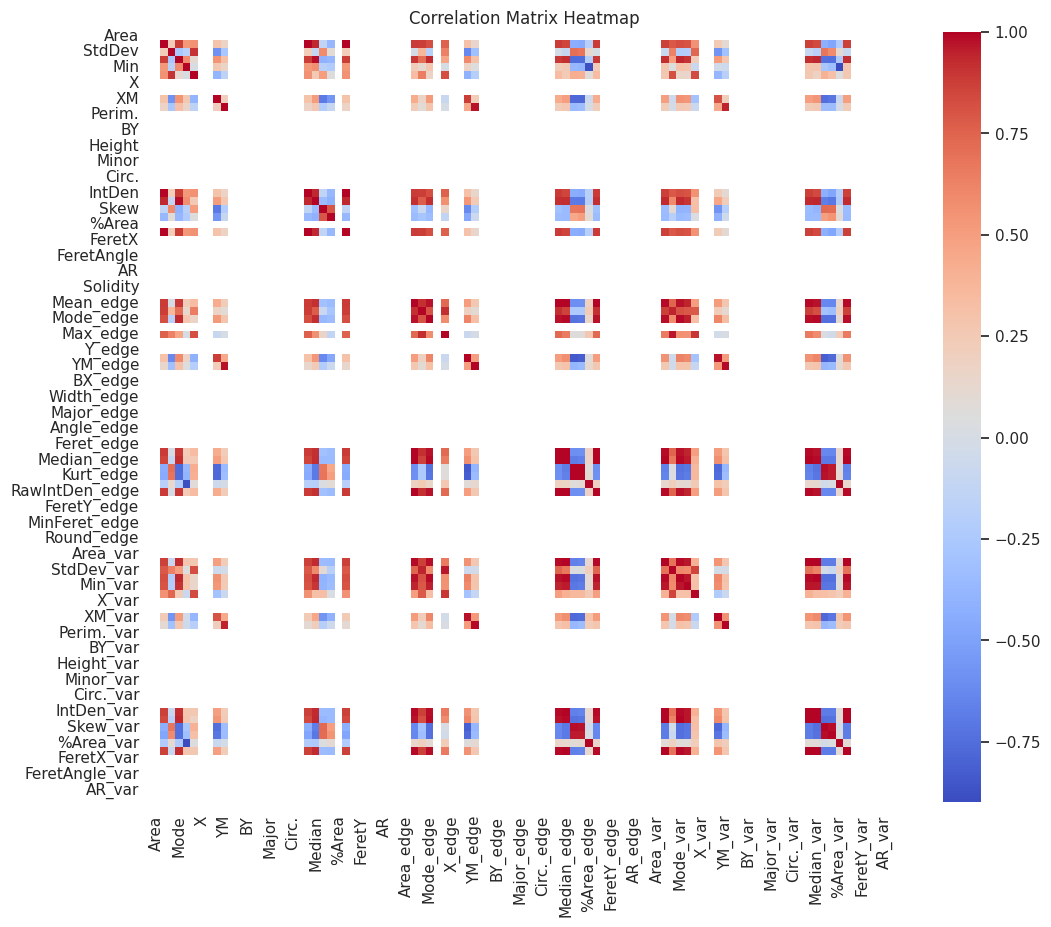

In [9]:
correlation_matrix = data.iloc[:, 1:-1].corr()

# Visualize the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Drop all columns with constant values

In [10]:
# Identify columns with constant values
constant_cols = [col for col in data.columns if data[col].nunique() == 1]

# Drop these columns
data = data.drop(columns=constant_cols)

data.head()

,Label,Mean,StdDev,Mode,Min,Max,XM,YM,IntDen,Median,...,Min_var,Max_var,XM_var,YM_var,IntDen_var,Median_var,Skew_var,Kurt_var,%Area_var,RawIntDen_var
0,image-final_00160000.tif,27.842,18.627,15,4,117,79.839,64.660,571427.902,18,...,0,95,79.659,64.235,190129.061,7,2.405,9.497,100.0,12404093
1,image-final_00160001.tif,28.783,19.877,15,2,124,79.822,64.699,590744.511,18,...,1,117,79.429,64.281,200295.769,7,2.622,11.273,100.0,13067373
2,image-final_00160002.tif,29.737,21.141,15,1,135,79.809,64.752,610327.274,18,...,1,134,79.415,64.379,211909.251,8,2.834,13.094,100.0,13825041
3,image-final_00160003.tif,30.694,22.399,15,2,138,79.787,64.801,629963.225,18,...,1,165,79.358,64.421,223928.310,8,3.071,15.227,100.0,14609169
4,image-final_00160004.tif,31.649,23.669,15,3,146,79.766,64.844,649573.947,19,...,1,185,79.319,64.516,238129.651,8,3.335,17.903,100.0,15535670


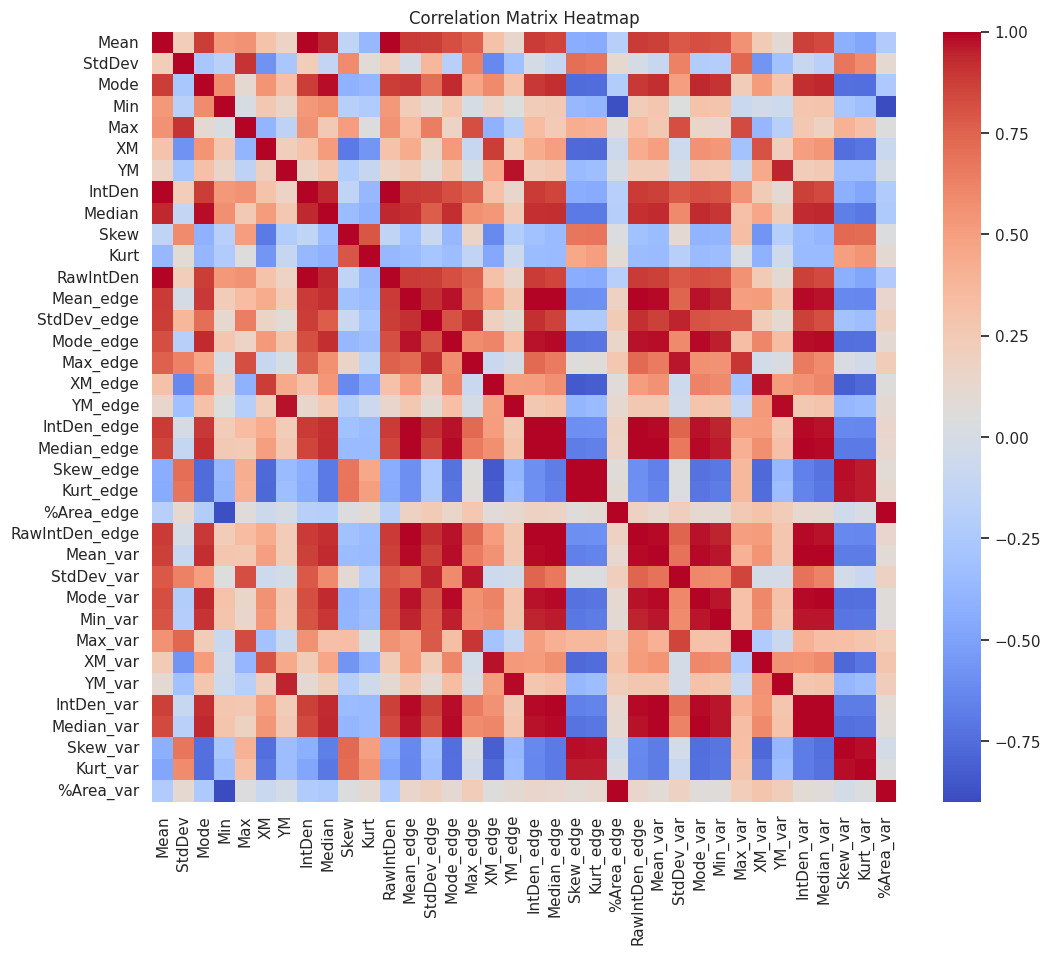

In [11]:
correlation_matrix = data.iloc[:, 1:-1].corr()

# Visualize the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
label_list = data['Label'].tolist()

In [13]:
# Filter features based on cross-correlation (optional)
# For example, you might want to remove features with low correlation
# with the target variable or with high correlation with each other.

# Remove features with correlation above a threshold
threshold = 0.7
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
data_filtered = data.iloc[:, 2:].drop(to_drop, axis=1)

# Drop NaN values from the filtered data
data_filtered = data_filtered.dropna()

data_filtered.head()

,StdDev,Min,XM,YM,Skew,%Area_edge,RawIntDen_var
0,18.627,4,79.839,64.660,1.261,99.689,12404093
1,19.877,2,79.822,64.699,1.263,99.690,13067373
2,21.141,1,79.809,64.752,1.267,99.706,13825041
3,22.399,2,79.787,64.801,1.269,99.708,14609169
4,23.669,3,79.766,64.844,1.272,99.713,15535670


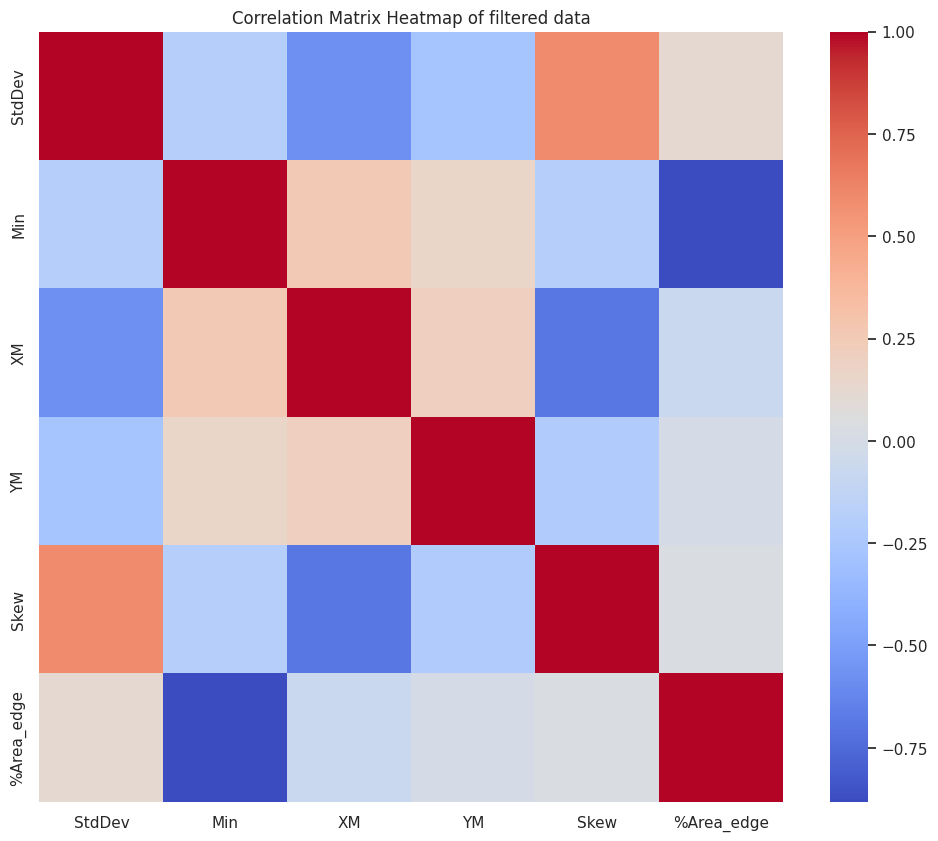

In [14]:
correlation_matrix = data_filtered.iloc[:, 0:-1].corr()

# Visualize the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of filtered data')
plt.show()

Clearing and scaling

In [15]:
actual_columns = data_filtered.columns.tolist()
print(len(actual_columns))
print(actual_columns)

7
['StdDev', 'Min', 'XM', 'YM', 'Skew', '%Area_edge', 'RawIntDen_var']


In [16]:
data = data_filtered[actual_columns].values;

scaled_data = StandardScaler().fit_transform(data)
print(len(scaled_data))

645


# Dimension reduction

## PCA

Explained variance ratio: [0.39661014 0.24704274 0.13984749 0.12569243]


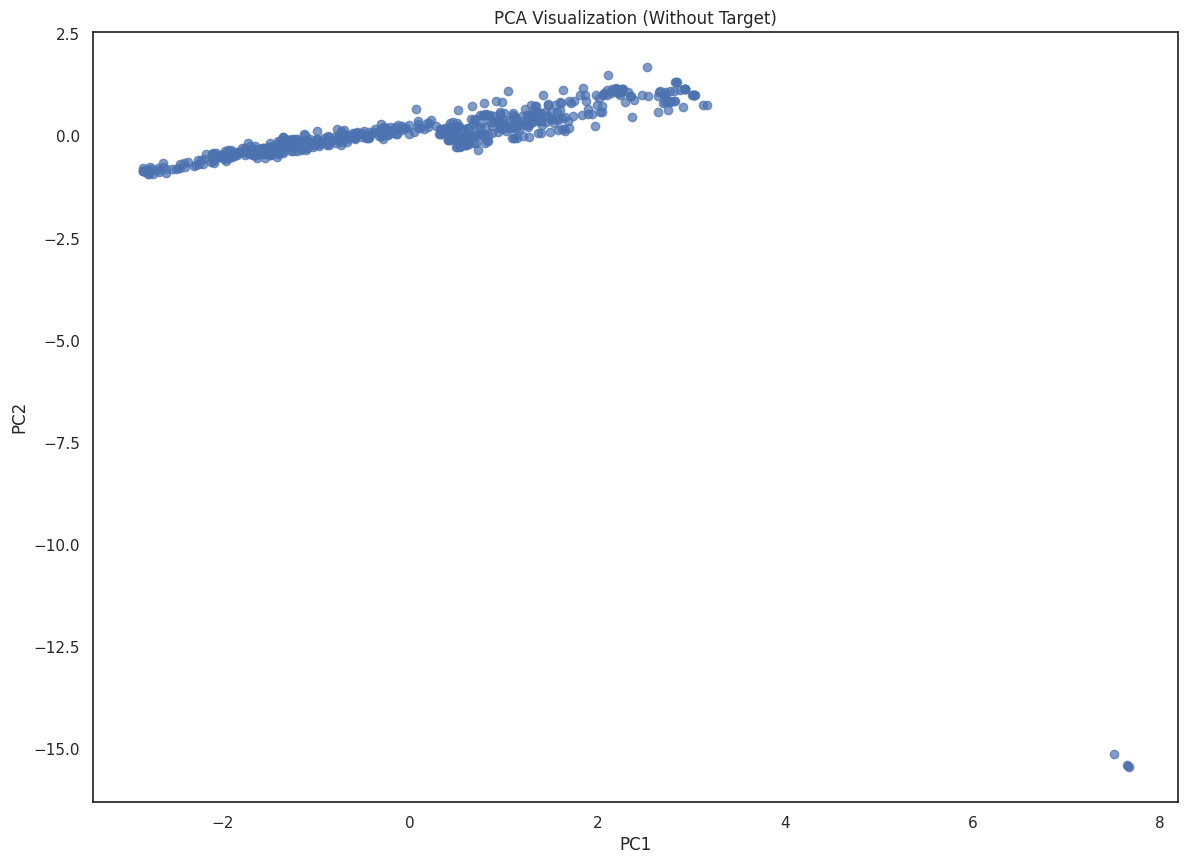

In [17]:
from sklearn.decomposition import PCA

# Choose the number of principal components to retain
n_components = 4

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit and transform the data
principal_components = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Visualization
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

## UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


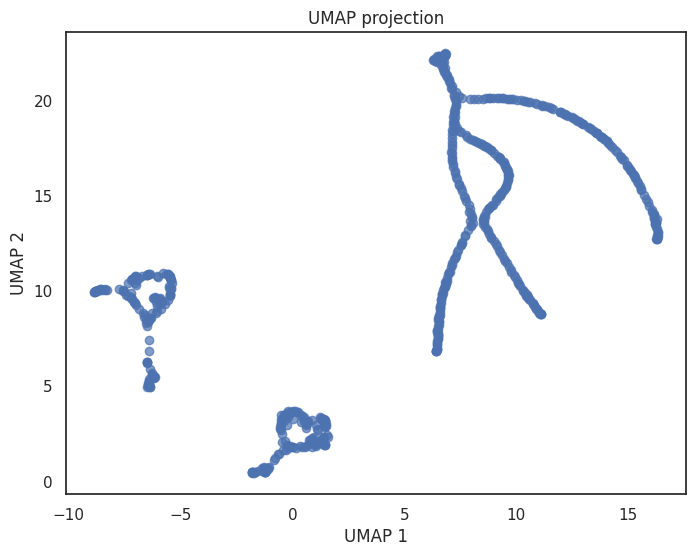

In [19]:
import umap.umap_ as umap

# UMAP
reducer_umap = umap.UMAP(n_components=2, random_state=42, min_dist=0.1)
embedding_umap = reducer_umap.fit_transform(scaled_data)
embedding_umap.shape


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], alpha=0.7)
plt.title("UMAP projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

## t-SNE

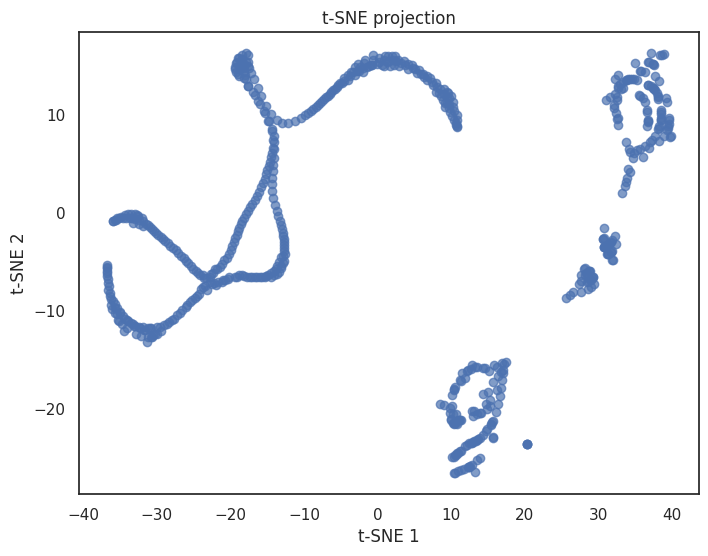

In [21]:
from sklearn.manifold import TSNE # Import t-SNE

# t-SNE
reducer_t_sne = TSNE(n_components=2, random_state=42)
embedding_t_sne = reducer_t_sne.fit_transform(scaled_data)
embedding_t_sne.shape


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(embedding_t_sne[:, 0], embedding_t_sne[:, 1], alpha=0.7)
plt.title("t-SNE projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


# Cluster Analysis

##K-means

#### K-means + PCA

Optimální počet klastrů: 7


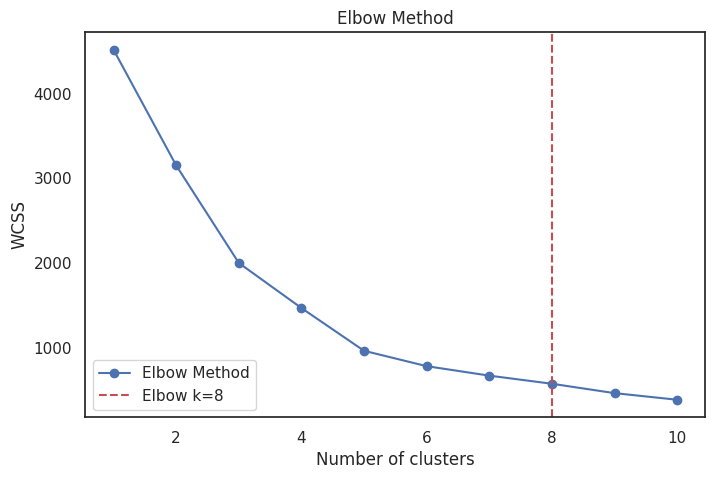

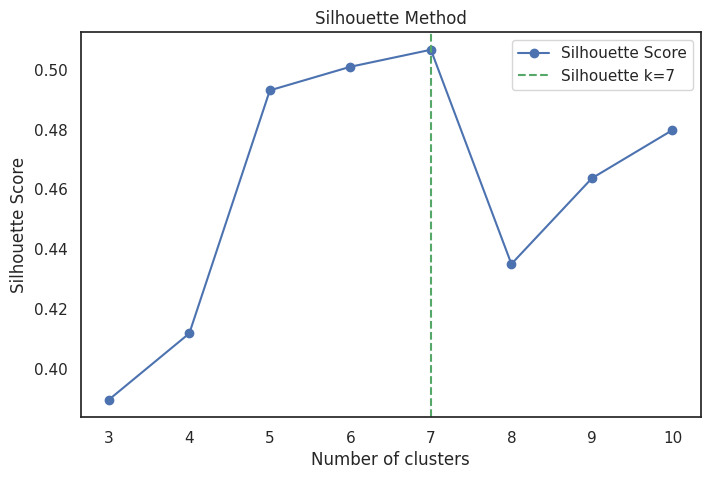

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Find the point with the largest break (second derivative)
diffs = np.diff(wcss, 2)
elbow_k = K_range[np.argmin(diffs) + 1]

# Silhouette Score
sil_scores = []
sil_k_values = range(3, 11)

for k in sil_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, labels))

best_silhouette_k = sil_k_values[np.argmax(sil_scores)]

# Selecting the optimal number of clusters
optimal_k = best_silhouette_k  # Priority for Silhouette Score
print(f"Optimální počet klastrů: {optimal_k}")

# Using optimal_k in KMeans
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(scaled_data)

# Plots
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', label="Elbow Method")
plt.axvline(elbow_k, color='r', linestyle='dashed', label=f"Elbow k={elbow_k}")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.legend()
plt.title("Elbow Method")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sil_k_values, sil_scores, marker='o', label="Silhouette Score")
plt.axvline(best_silhouette_k, color='g', linestyle='dashed', label=f"Silhouette k={best_silhouette_k}")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.title("Silhouette Method")
plt.show()

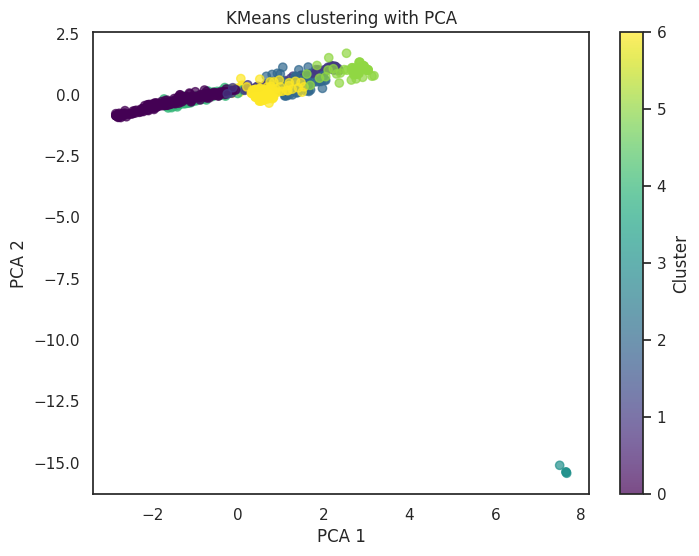

In [23]:

# Clustering KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(principal_components)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("KMeans clustering with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [24]:
import plotly.express as px

df = pd.DataFrame(principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4"])
df["Cluster"] = clusters
df["Label"] = label_list

# Interactive plot
fig = px.scatter(df, x="PCA1", y="PCA2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="PCA interactive plot")

fig.update_layout(legend_title_text="Clusters")
fig.show()

#### K-means + UMAP

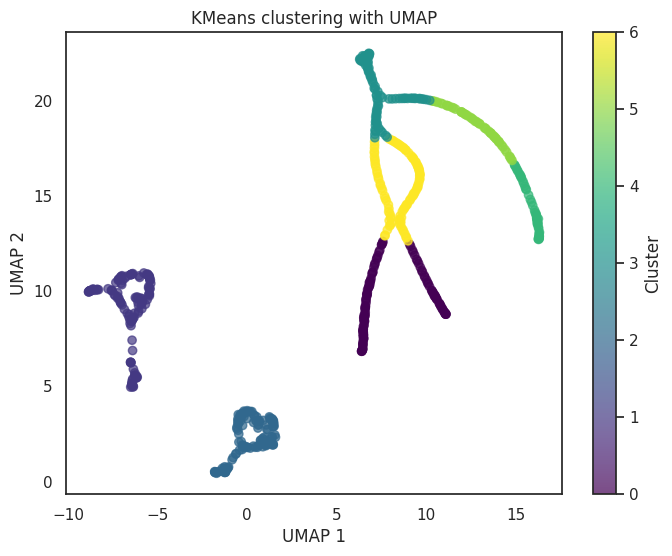

In [25]:
# Clustering KMeans
kmeans = KMeans(n_clusters= optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embedding_umap)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("KMeans clustering with UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

In [26]:
df = pd.DataFrame(embedding_umap, columns=["UMAP1", "UMAP2"])
df["Cluster"] = clusters
df["Label"] = label_list

fig = px.scatter(df, x="UMAP1", y="UMAP2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="UMAP interactive plot")

fig.update_layout(legend_title_text="Clusters")
fig.show()

#### K-means + T-SNE

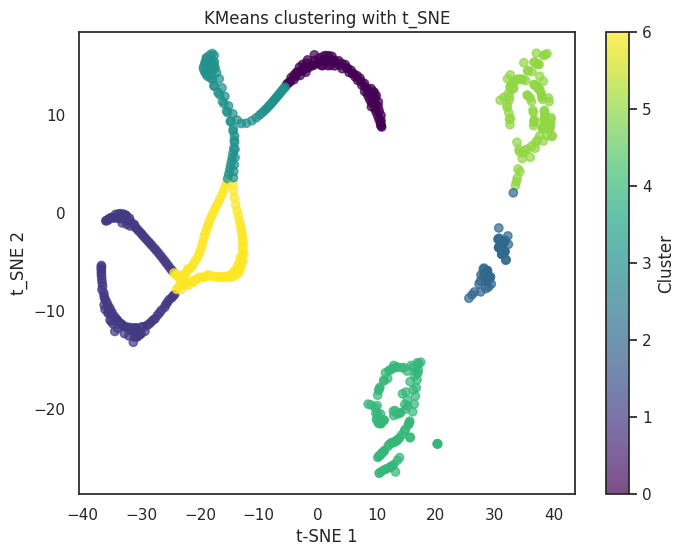

In [27]:
# Clustering KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embedding_t_sne)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(embedding_t_sne[:, 0], embedding_t_sne[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("KMeans clustering with t_SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t_SNE 2")
plt.colorbar(label="Cluster")
plt.show()

In [28]:
df = pd.DataFrame(embedding_t_sne, columns=["t-SNE1", "t-SNE2"])
df["Cluster"] = clusters
df["Label"] = label_list

fig = px.scatter(df, x="t-SNE1", y="t-SNE2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="t-SNE interactive plot")

fig.update_layout(legend_title_text="Clusters")
fig.show()

##DBSCAN

Optimal eps: 0.941
Optimal min_samples: 4


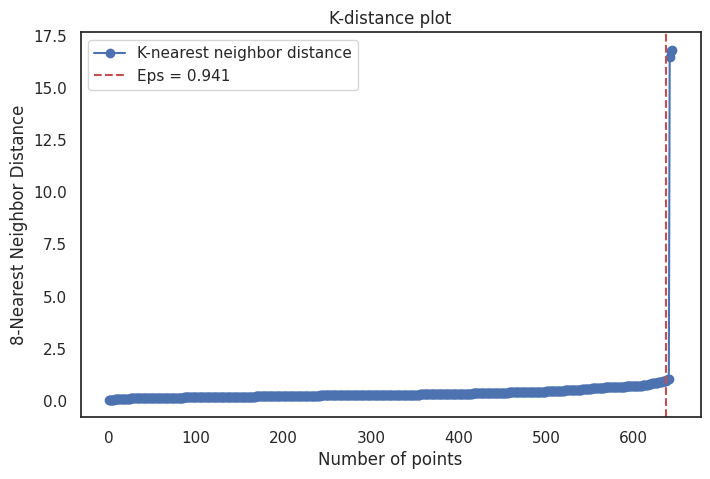

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
from kneed import KneeLocator
from scipy.stats import iqr


# Automatically find eps using k-distance plot
D = scaled_data.shape[1]  # Number of dimension
nbrs = NearestNeighbors(n_neighbors=D + 1).fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)
distances = np.sort(distances[:, -1])

# Find the breakpoint/knee using KneeLocator
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee.knee]

# Automatic calculation of min_samples using IQR
min_samples_default = int(np.ceil(iqr(distances)))  # Use of interquartile dispersion
min_samples_default = max(3, min_samples_default)   # Min 3 poinrs for creating cluster

# Optimizing min_samples using Davies-Bouldin Index
min_samples_range = range(max(2, D - 3), D + 5, 2)
best_score = float("inf")
best_min_samples = min_samples_default

for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)

    # Evaluate DBI only for clusters (ignoring outliers)
    if len(set(labels) - {-1}) > 1:
        score = davies_bouldin_score(scaled_data, labels)
        if score < best_score:  # The smaller the DBI, the better the clustering
            best_score = score
            best_min_samples = min_samples

# Using optimized values
final_dbscan = DBSCAN(eps=optimal_eps, min_samples=best_min_samples)
final_labels = final_dbscan.fit_predict(scaled_data)

print(f"Optimal eps: {optimal_eps:.3f}")
print(f"Optimal min_samples: {best_min_samples}")

# Graph k-distance plot
plt.figure(figsize=(8, 5))
plt.plot(distances, marker='o', label="K-nearest neighbor distance")
plt.axvline(knee.knee, color='r', linestyle='dashed', label=f"Eps = {optimal_eps:.3f}")
plt.xlabel("Number of points")
plt.ylabel(f"{D + 1}-Nearest Neighbor Distance")
plt.legend()
plt.title("K-distance plot")
plt.show()


In [30]:
from kneed import KneeLocator

# K-distance plot for eps
nbrs = NearestNeighbors(n_neighbors=min_samples_default).fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)
distances = np.sort(distances[:, -1])

# Find eps with KneeLocator
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")

# Combination KneeLocator + percentil filtr
if knee.knee is not None:
    kneed_eps = distances[knee.knee]
else:
    kneed_eps = np.percentile(distances, 90)  # Fallback 90. percentil

# Ensure that the eps is not extremely small or large
kneed_eps = max(kneed_eps, np.percentile(distances, 80))  # Min 80. percentil
kneed_eps = min(kneed_eps, np.percentile(distances, 95))  # Max 95. percentil

print(f"Kneed eps: {kneed_eps:.3f}")

Kneed eps: 0.396


In [31]:
def evaluate_dbscan(eps, min_samples, scaled_data):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)

    # Check if there are at least 2 clusters (excluding noise -1 label)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters >= 2:
        return silhouette_score(scaled_data, labels)
    else:
        return -1  # Return a low score if less than 2 clusters

# Try different values of eps and choose the best
eps_values = np.linspace(0.1, 3, 100)  # eps values
best_score = -1
best_eps = None

for eps in eps_values:
    score = evaluate_dbscan(eps, min_samples_default, scaled_data)
    if score > best_score:
        best_score = score
        best_eps = eps

print(f"Best eps by cross-validation: {best_eps:.3f}")

Best eps by cross-validation: 1.594


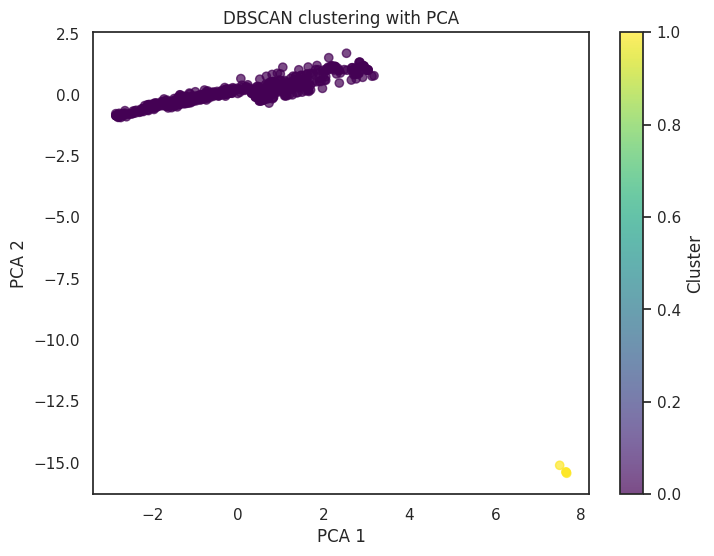

In [32]:
# DBSCAN with PCA
dbscan_pca = DBSCAN(eps=best_eps, min_samples=best_min_samples) # Adjust eps and min_samples as needed
clusters_dbscan_pca = dbscan_pca.fit_predict(principal_components)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_dbscan_pca, cmap="viridis", alpha=0.7)
plt.title("DBSCAN clustering with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

df = pd.DataFrame(principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4"])
df["Cluster"] = clusters_dbscan_pca
df["Label"] = label_list
fig = px.scatter(df, x="PCA1", y="PCA2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="DBSCAN PCA interactive plot")

fig.update_layout(legend_title_text="Clusters")
fig.show()


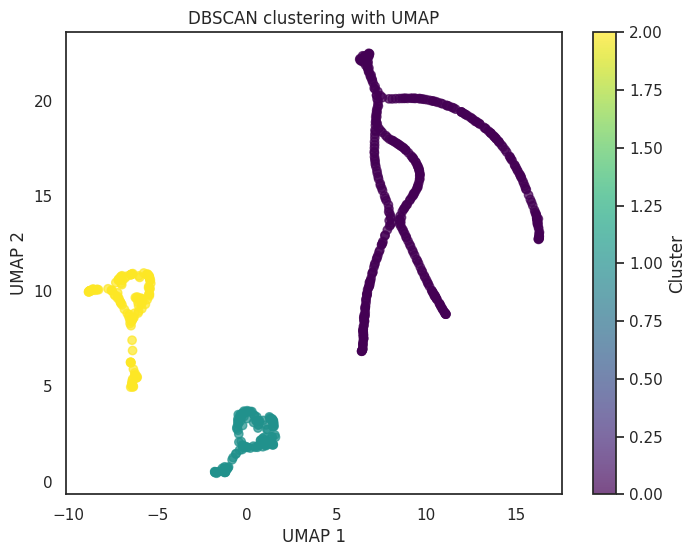

In [33]:
# DBSCAN with UMAP
dbscan_umap = DBSCAN(eps=best_eps, min_samples=best_min_samples) # Adjust eps and min_samples as needed
clusters_dbscan_umap = dbscan_umap.fit_predict(embedding_umap)

plt.figure(figsize=(8, 6))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=clusters_dbscan_umap, cmap="viridis", alpha=0.7)
plt.title("DBSCAN clustering with UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

df = pd.DataFrame(embedding_umap, columns=["UMAP1", "UMAP2"])
df["Cluster"] = clusters_dbscan_umap
df["Label"] = label_list
fig = px.scatter(df, x="UMAP1", y="UMAP2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="DBSCAN UMAP interactive plot")
fig.update_layout(legend_title_text="Clusters")
fig.show()

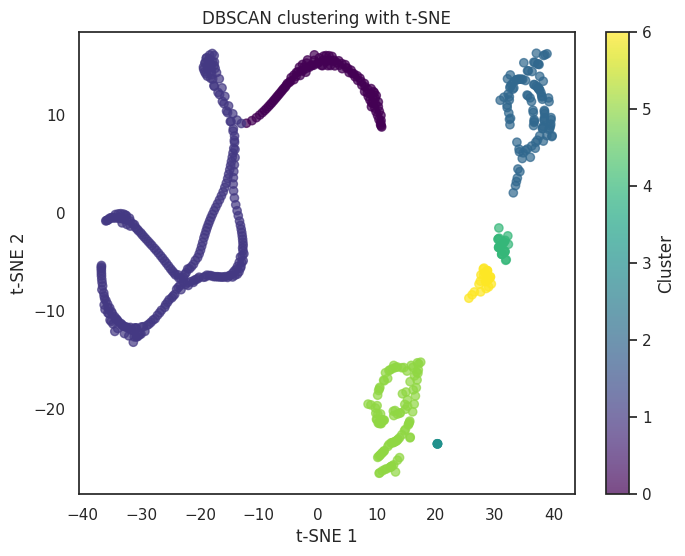

In [34]:
# DBSCAN with t-SNE
dbscan_tsne = DBSCAN(eps=best_eps, min_samples=best_min_samples) # Adjust eps and min_samples as needed
clusters_dbscan_tsne = dbscan_tsne.fit_predict(embedding_t_sne)

plt.figure(figsize=(8, 6))
plt.scatter(embedding_t_sne[:, 0], embedding_t_sne[:, 1], c=clusters_dbscan_tsne, cmap="viridis", alpha=0.7)
plt.title("DBSCAN clustering with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")
plt.show()

df = pd.DataFrame(embedding_t_sne, columns=["t-SNE1", "t-SNE2"])
df["Cluster"] = clusters_dbscan_tsne
df["Label"] = label_list
fig = px.scatter(df, x="t-SNE1", y="t-SNE2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="DBSCAN t-SNE interactive plot")
fig.update_layout(legend_title_text="Clusters")
fig.show()

## HDBSCAN

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



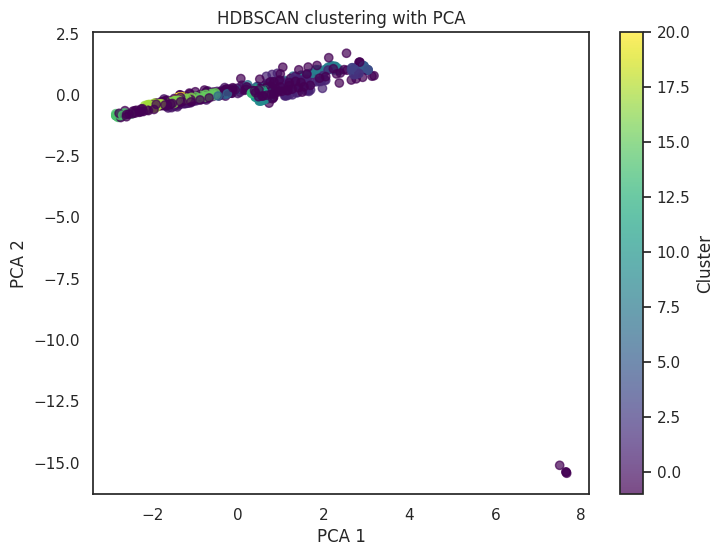

In [35]:
import hdbscan

# HDBSCAN with PCA
clusterer_hdbscan_pca = hdbscan.HDBSCAN(min_cluster_size=best_min_samples, gen_min_span_tree=True)  # Adjust parameters as needed
clusters_hdbscan_pca = clusterer_hdbscan_pca.fit_predict(principal_components)


plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_hdbscan_pca, cmap="viridis", alpha=0.7)
plt.title("HDBSCAN clustering with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


df = pd.DataFrame(principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4"])
df["Cluster"] = clusters_hdbscan_pca
df["Label"] = label_list
fig = px.scatter(df, x="PCA1", y="PCA2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="HDBSCAN PCA interactive plot")
fig.update_layout(legend_title_text="Clusters")
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



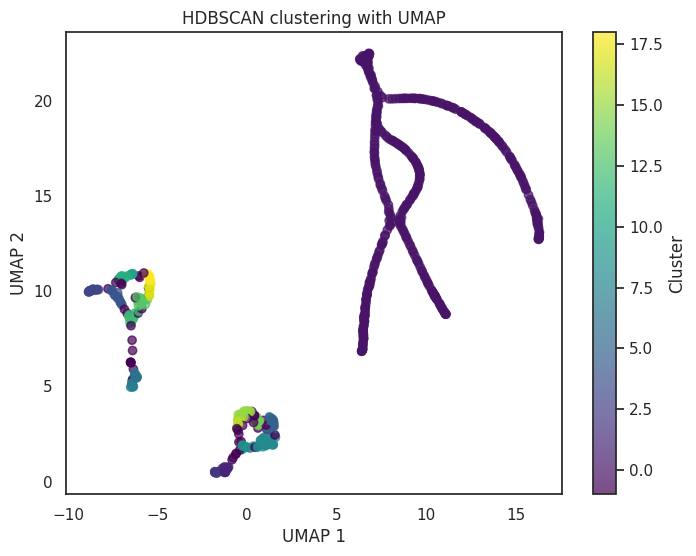

In [36]:
# HDBSCAN with UMAP
clusterer_hdbscan_umap = hdbscan.HDBSCAN(min_cluster_size=best_min_samples, gen_min_span_tree=True)  # Adjust parameters as needed
clusters_hdbscan_umap = clusterer_hdbscan_umap.fit_predict(embedding_umap)


plt.figure(figsize=(8, 6))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=clusters_hdbscan_umap, cmap="viridis", alpha=0.7)
plt.title("HDBSCAN clustering with UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()


df = pd.DataFrame(embedding_umap, columns=["UMAP1", "UMAP2"])
df["Cluster"] = clusters_hdbscan_umap
df["Label"] = label_list
fig = px.scatter(df, x="UMAP1", y="UMAP2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="HDBSCAN UMAP interactive plot")
fig.update_layout(legend_title_text="Clusters")
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



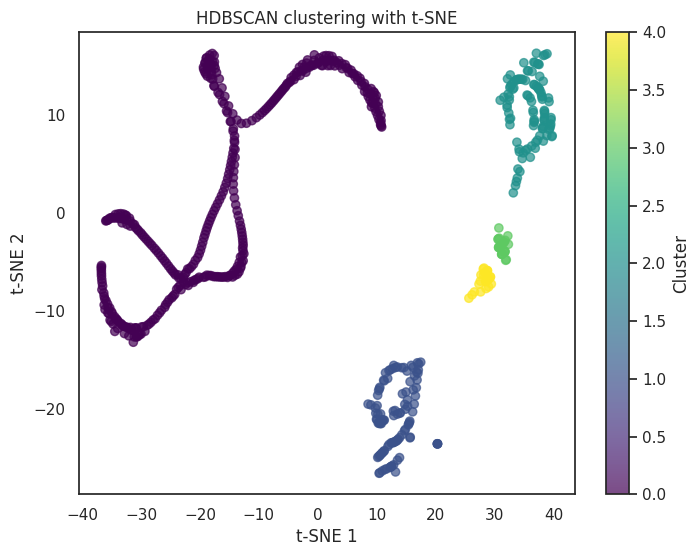

In [37]:
# HDBSCAN with t-SNE
clusterer_hdbscan_tsne = hdbscan.HDBSCAN(min_cluster_size=best_min_samples, gen_min_span_tree=True)  # Adjust parameters as needed
clusters_hdbscan_tsne = clusterer_hdbscan_tsne.fit_predict(embedding_t_sne)


plt.figure(figsize=(8, 6))
plt.scatter(embedding_t_sne[:, 0], embedding_t_sne[:, 1], c=clusters_hdbscan_tsne, cmap="viridis", alpha=0.7)
plt.title("HDBSCAN clustering with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")
plt.show()


df = pd.DataFrame(embedding_t_sne, columns=["t-SNE1", "t-SNE2"])
df["Cluster"] = clusters_hdbscan_tsne
df["Label"] = label_list
fig = px.scatter(df, x="t-SNE1", y="t-SNE2", color=df["Cluster"].astype(str),
                 hover_data=["Label"], title="HDBSCAN t-SNE interactive plot")

fig.show()